In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

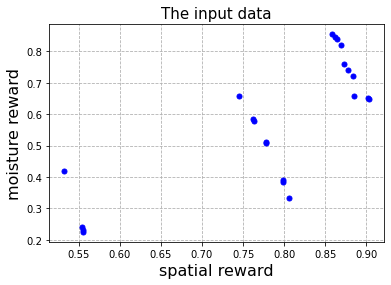

In [39]:
# Spatial vs Moisture
data_points = [[0.74297972, 0.43861609, 0.74297972, 0.97533451, 0.99950383, 0.99999791, 
                  0.99999791, 0.99950383, 0.97533451, 0.74297971, 0.43861399, 
                  0.74248355, 0.95066902, 0.74248355, 0.43861399, 0.74297762, 
                  0.97483835, 0.97483835, 0.74297762, 0.43861608, 0.74297972, 0.97533451],
                [0.56349887, 0.34613042, 0.65770121, 0.79747314, 0.97030054, 0.9955728, 
                   0.98097963, 0.94359359, 0.70435853, 0.30699427, 0.17763862, 
                   0.35719056, 0.70823421, 0.48561455, 0.19007874, 0.48733299, 
                   0.84993315, 0.82400426, 0.36457368, 0.18344314, 0.56885874, 0.69979602]
               ]
# Convert 2d list into 2d array
spatial_moisture_reward = np.array(data_points)

# Iterate through every values for each objetives. In our case, 22 values.
for ii in range(0, spatial_moisture_reward.shape[1]):
    w = spatial_moisture_reward[:,ii]
    fac = 0.6 + 0.4 * np.linalg.norm(w)
    spatial_moisture_reward[:,ii] = (1 / fac) * w

h = plt.plot(spatial_moisture_reward[0,:], spatial_moisture_reward[1,:], '.b', markersize=10, label='Non Pareto-optimal')
_ = plt.title('The input data', fontsize=15)

plt.xlabel('spatial reward', fontsize=16)
plt.ylabel('moisture reward', fontsize=16)

plt.grid(True, linestyle='--')

In [35]:
import oapackage

In [51]:
pareto = oapackage.ParetoDoubleLong()

for ii in range(0, spatial_moisture_reward.shape[1]):
    w = oapackage.doubleVector((spatial_moisture_reward[0,ii], spatial_moisture_reward[1,ii]))
    pareto.addvalue(w, ii)
# sorted_pareto = sorted(pareto, reverse=True)

pareto.show(verbose=1)

Pareto: 10 optimal values, 10 objects
<class 'oalib.ParetoDoubleLong'>


3
4
5
6
7
8
12
16
17
21
[[0.8835008  0.86372158 0.85878452 0.86182134 0.86927103 0.90205893
  0.88500785 0.87247049 0.87777803 0.90294932]
 [0.72238617 0.83848555 0.8549843  0.84543094 0.82064575 0.65144101
  0.65931762 0.7606816  0.74196182 0.64786013]]


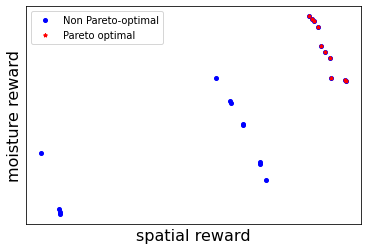

In [68]:
lst = pareto.allindices() # the indices of the Pareto optimal designs
for i in lst:
    print(i)
    
optimal_datapoints = spatial_moisture_reward[:,lst]
print(optimal_datapoints)

h = plt.plot(spatial_moisture_reward[0,:], spatial_moisture_reward[1,:], '.b', marker="o", markersize=4, label='Non Pareto-optimal')
hp = plt.plot(optimal_datapoints[0,:], optimal_datapoints[1,:], '.r', marker="*", markersize=4, label='Pareto optimal')

plt.xlabel('spatial reward', fontsize=16)
plt.ylabel('moisture reward', fontsize=16)
plt.grid(True, linestyle='--')

plt.xticks([])
plt.yticks([])

_=plt.legend(loc="upper left", numpoints=1)